___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [708]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay
from sklearn.model_selection import cross_validate

Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

SyntaxError: invalid syntax (2683459875.py, line 13)

In [ ]:
!pip install pandas

In [33]:
data = pd.read_csv("Churn_Modelling.csv")
df = data.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [35]:
df.shape

(10000, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [38]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [41]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

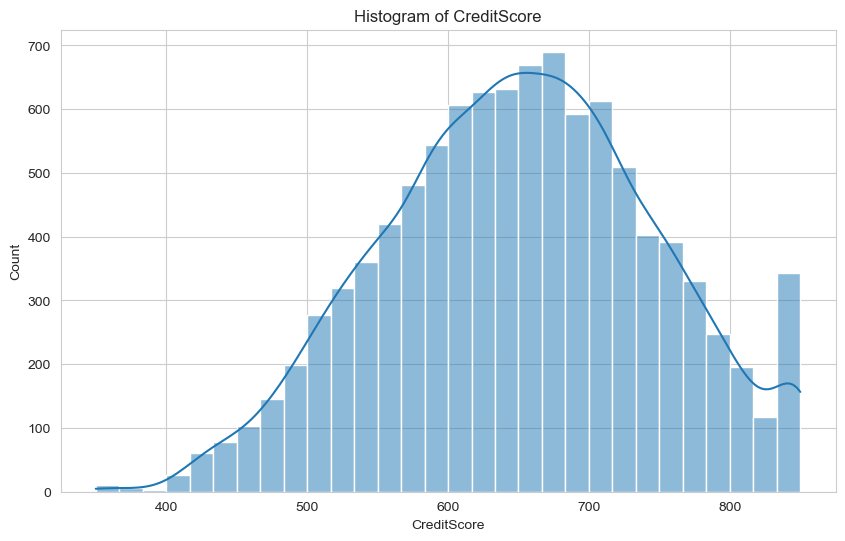

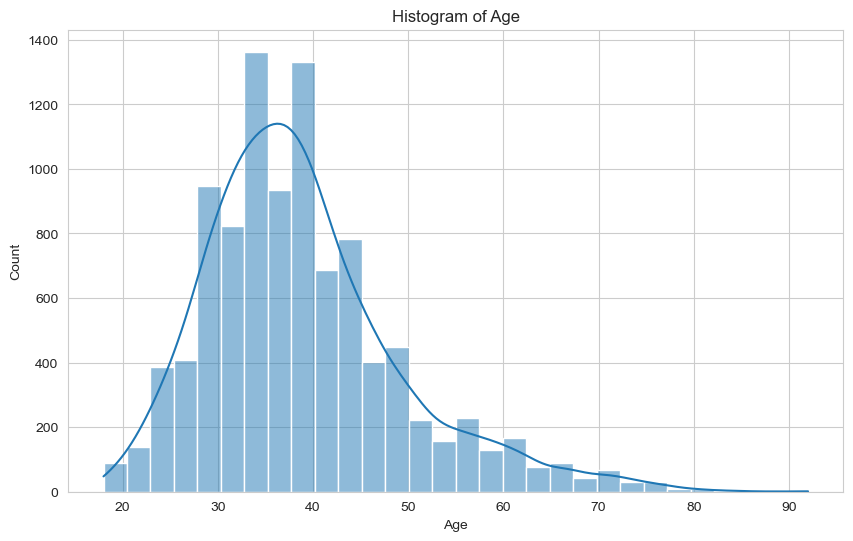

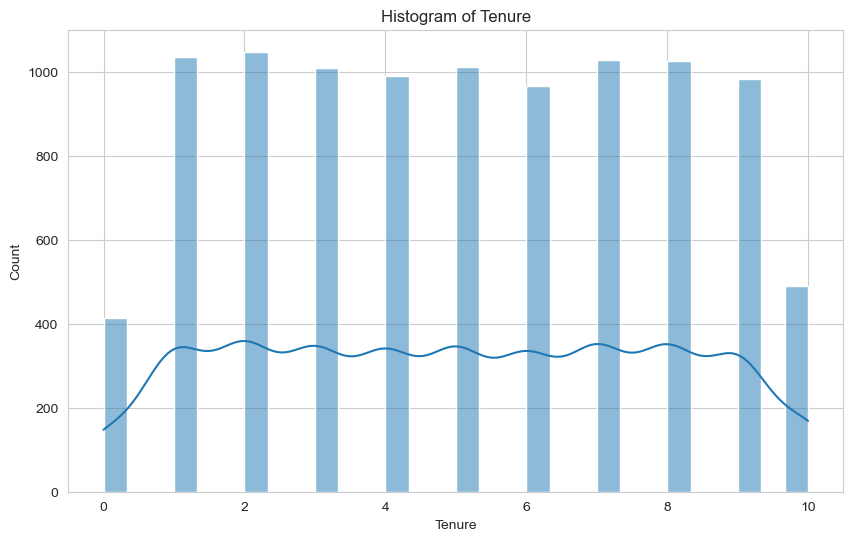

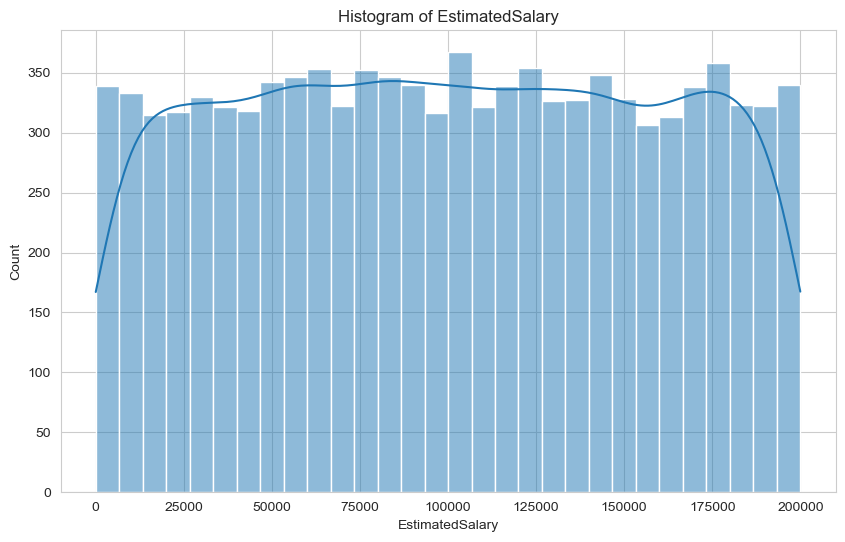

In [42]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

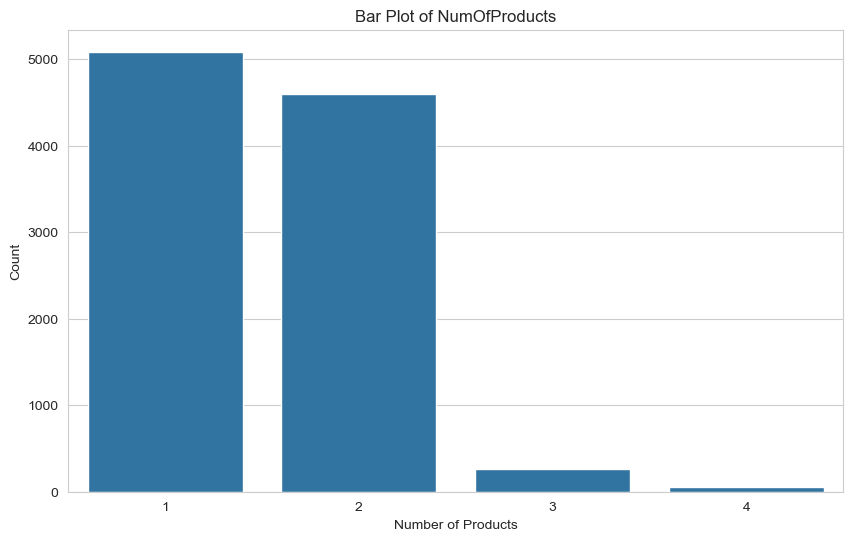

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df)
plt.title('Bar Plot of NumOfProducts')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

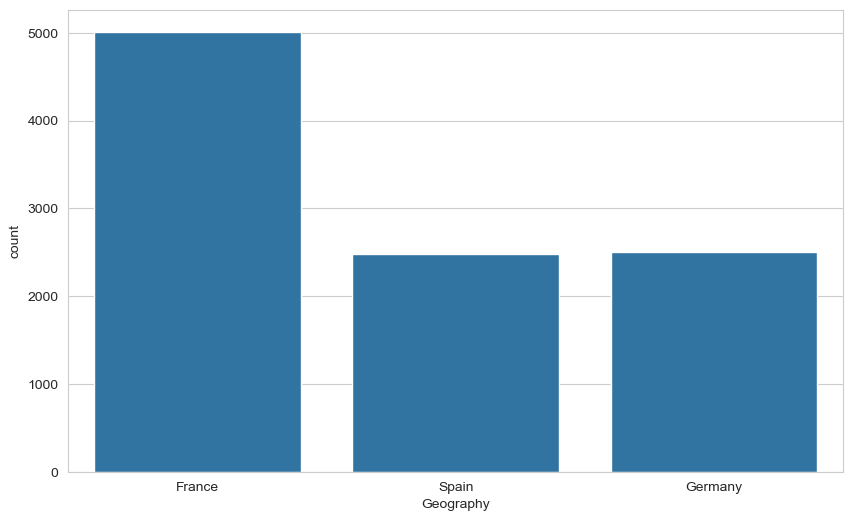

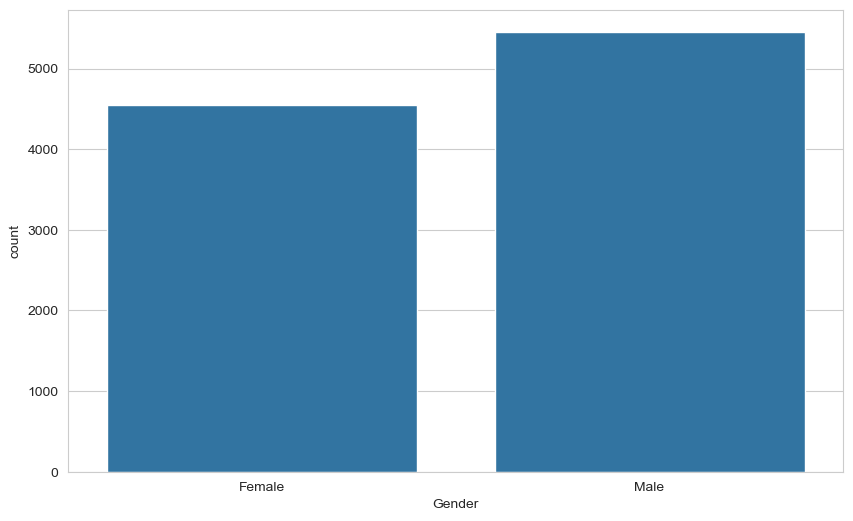

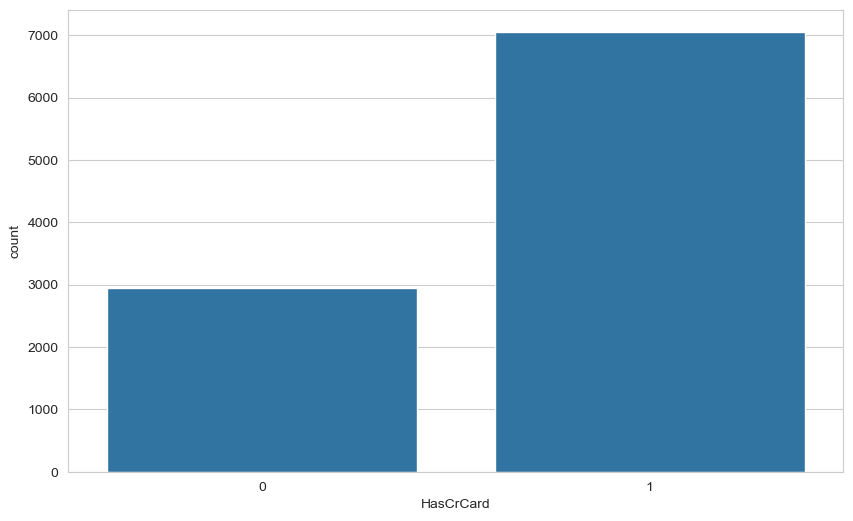

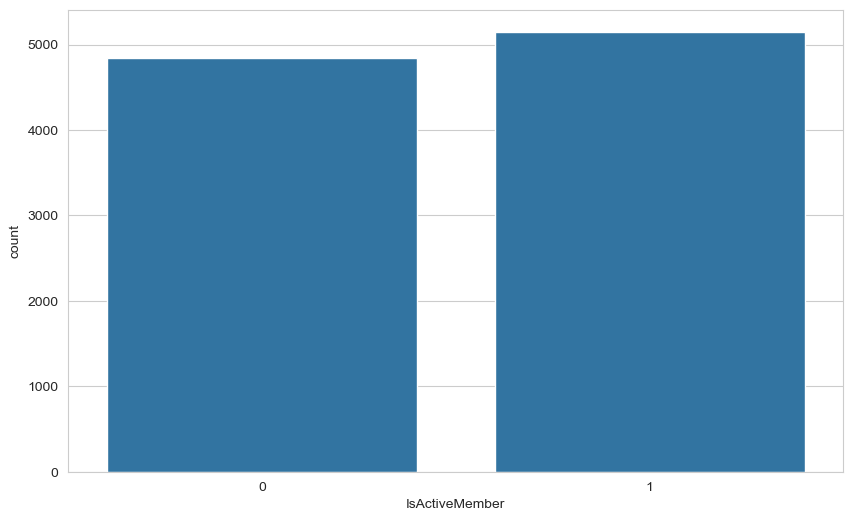

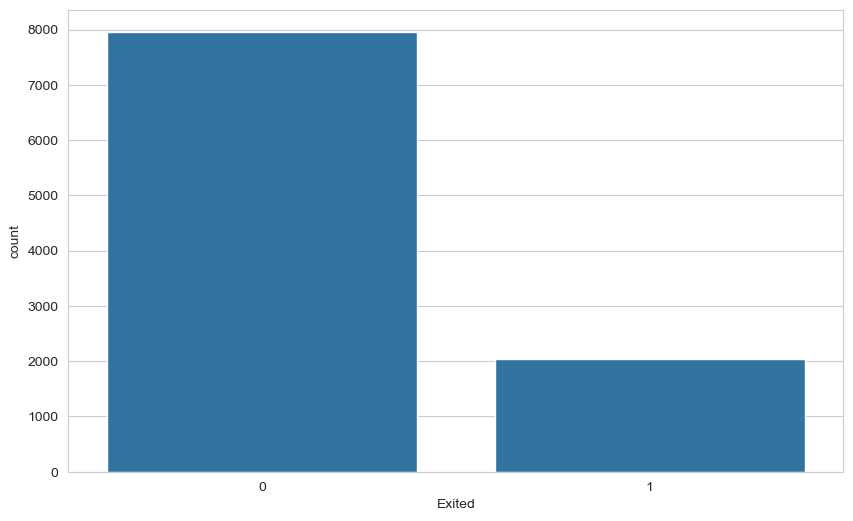

In [44]:
categorical_features = ['Geography', 'Gender','HasCrCard', 'IsActiveMember', 'Exited']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.show()

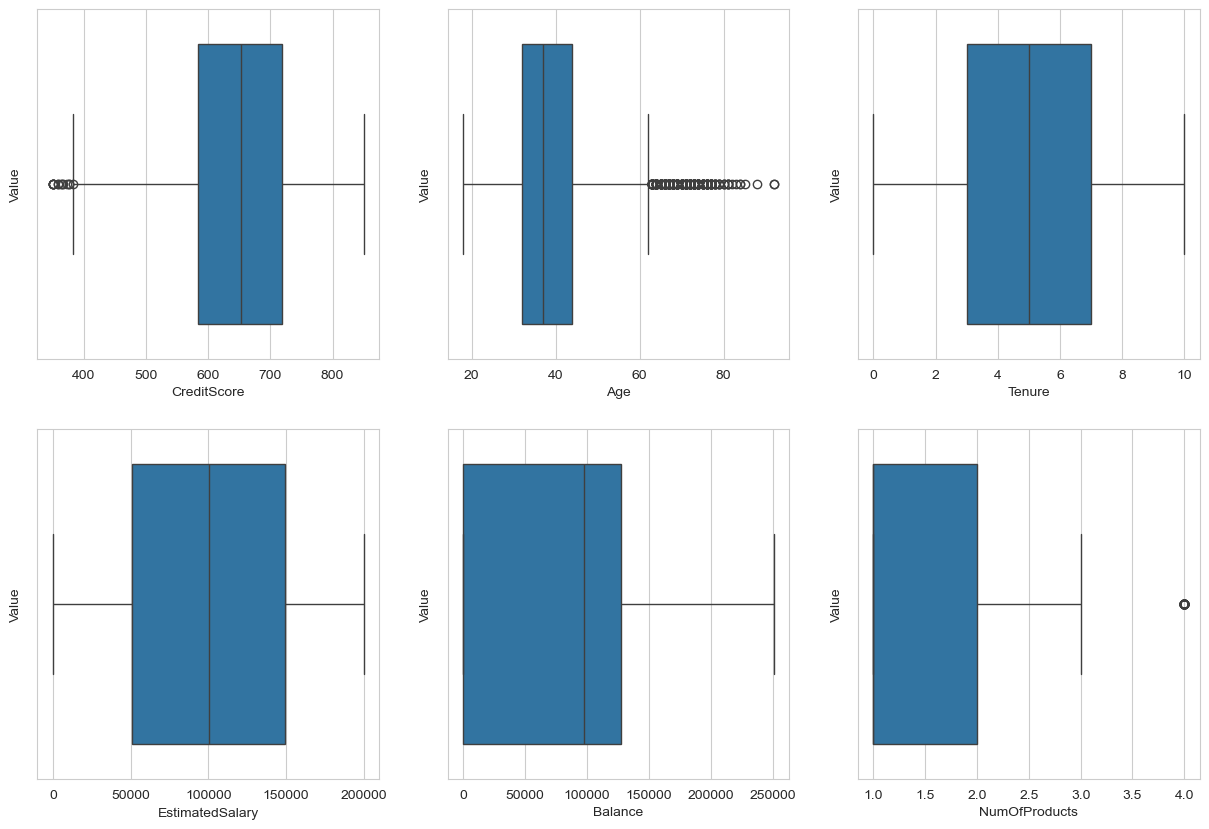

In [45]:
df_numeric = df[['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts']]

plt.figure(figsize=(15, 10))

numeric_features = df_numeric.columns

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)  # 2x3'lük alt grafikler oluşturduk
    sns.boxplot(x=df_numeric[feature])
    plt.xlabel(feature)
    plt.ylabel('Value')

In [46]:
df[df['Age'] > 80][['Age']]

,Age
766,82
2458,88
3033,85
3387,84
3531,84
4931,81
6443,92
6759,92
7526,81
7956,81


In [47]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [48]:
df[df['CreditScore'] < 400]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
942,376,France,Female,46,6,0.000,1,1,0,157333.690,1
1193,363,Spain,Female,28,6,146098.430,3,1,0,100615.140,1
1201,399,Germany,Male,46,2,127655.220,1,1,0,139994.680,1
1405,359,France,Female,44,6,128747.690,1,1,0,146955.710,1
1631,350,Spain,Male,54,1,152677.480,1,1,1,191973.490,1
1838,350,Germany,Male,39,0,109733.200,2,0,0,123602.110,1
1962,358,Spain,Female,52,8,143542.360,3,1,0,141959.110,1
2473,351,Germany,Female,57,4,163146.460,1,1,0,169621.690,1
2579,365,Germany,Male,30,0,127760.070,1,1,0,81537.850,1


In [49]:
df.groupby('EstimatedSalary')[['CreditScore']].mean()

,CreditScore
EstimatedSalary,
11.580,709.000
90.070,625.000
91.750,645.000
96.270,710.000
106.670,629.000
...,...
199909.320,620.000
199929.170,569.000
199953.330,608.000


In [50]:
df["Geography"].value_counts(normalize = True) * 100

Geography
France    50.140
Germany   25.090
Spain     24.770
Name: proportion, dtype: float64

In [51]:
df["Exited"].value_counts(normalize = True) * 100

Exited
0   79.630
1   20.370
Name: proportion, dtype: float64

In [52]:
#sns.pairplot(df, hue = "Exited")

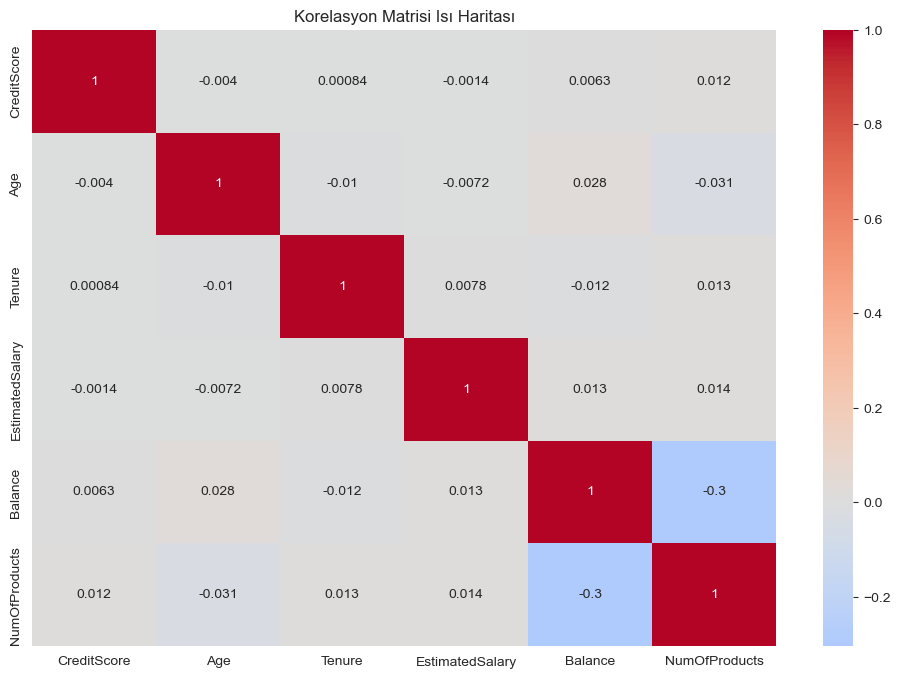

In [53]:
df_numeric = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts']
correlation_matrix = df[df_numeric].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()


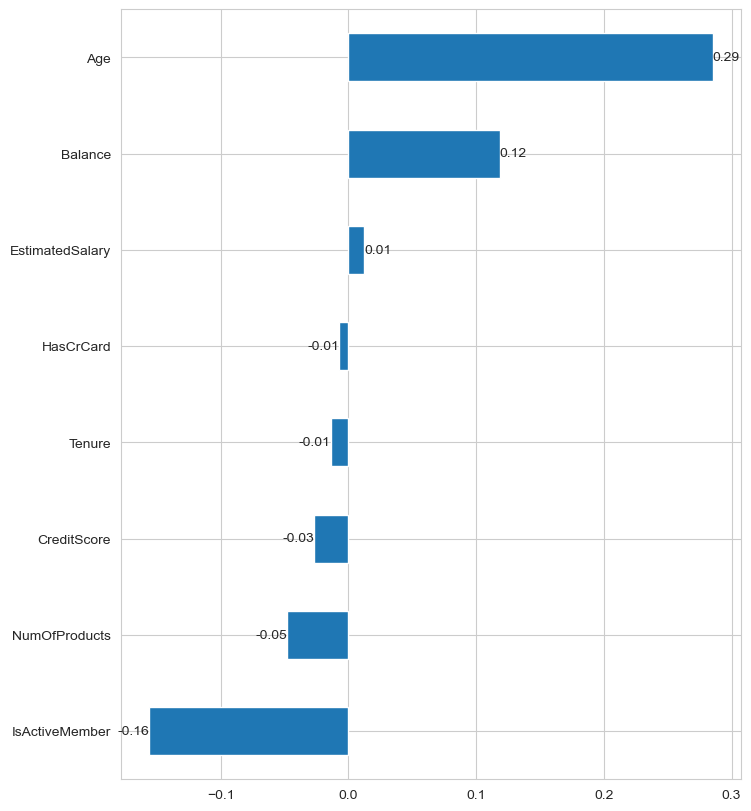

In [54]:
plt.figure(figsize=(8, 10))
ax=df.corr(numeric_only = True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

In [55]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Preprocessing of Data
- Train | Test Split, Scalling

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop('Exited', axis=1)
y = data['Exited']

In [58]:
import os

seed = 101
os.environ["TF_DETERMINISTIC_OPS"] = "1"

tf.keras.utils.set_random_seed(seed)

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    # Input data
    X, y,
    # Testing set size
    test_size=0.2,
    # Stratify the split based on the target variable
    stratify=y,
    # Seed for reproducibility
    random_state=seed
)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    # Training data
    X_train, y_train,
    # Validation set size
    test_size=0.1,
    # Stratify the split based on the target variable
    stratify=y_train,
    # Seed for reproducibility
    random_state=seed
)

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [62]:
print("Shape of train :", X_train.shape)
print("Shape of validation :", X_val.shape)
print("Shape of test :", X_test.shape)

Shape of train : (7200, 11)
Shape of validation : (800, 11)
Shape of test : (2000, 11)


## without class_weigth

### Create The Model

In [63]:
model = Sequential()

model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Precision", "Recall"])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                288       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 691 (2.70 KB)
Trainable params: 691 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=36,
          epochs=1000)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.5590 - precision: 0.2101 - recall: 0.0341 - val_loss: 0.4913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4732 - precision: 0.6222 - recall: 0.0191 - val_loss: 0.4709 - val_precision: 1.0000 - val_recall: 0.0245
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4551 - precision: 0.5934 - recall: 0.1104 - val_loss: 0.4620 - val_precision: 0.4722 - val_recall: 0.2086
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4399 - precision: 0.6554 - recall: 0.1854 - val_loss: 0.4430 - val_precision: 0.5538 - val_recall: 0.2209
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4285 - precision: 0.6523 - recall: 0.2277 - val_loss: 0.4311 - val_precision: 0.5909 - val_recall: 0.2393
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - lo

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,precision,recall,val_loss,val_precision,val_recall
0,0.559,0.210,0.034,0.491,0.000,0.000
1,0.473,0.622,0.019,0.471,1.000,0.025
2,0.455,0.593,0.110,0.462,0.472,0.209
3,0.440,0.655,0.185,0.443,0.554,0.221
4,0.428,0.652,0.228,0.431,0.591,0.239


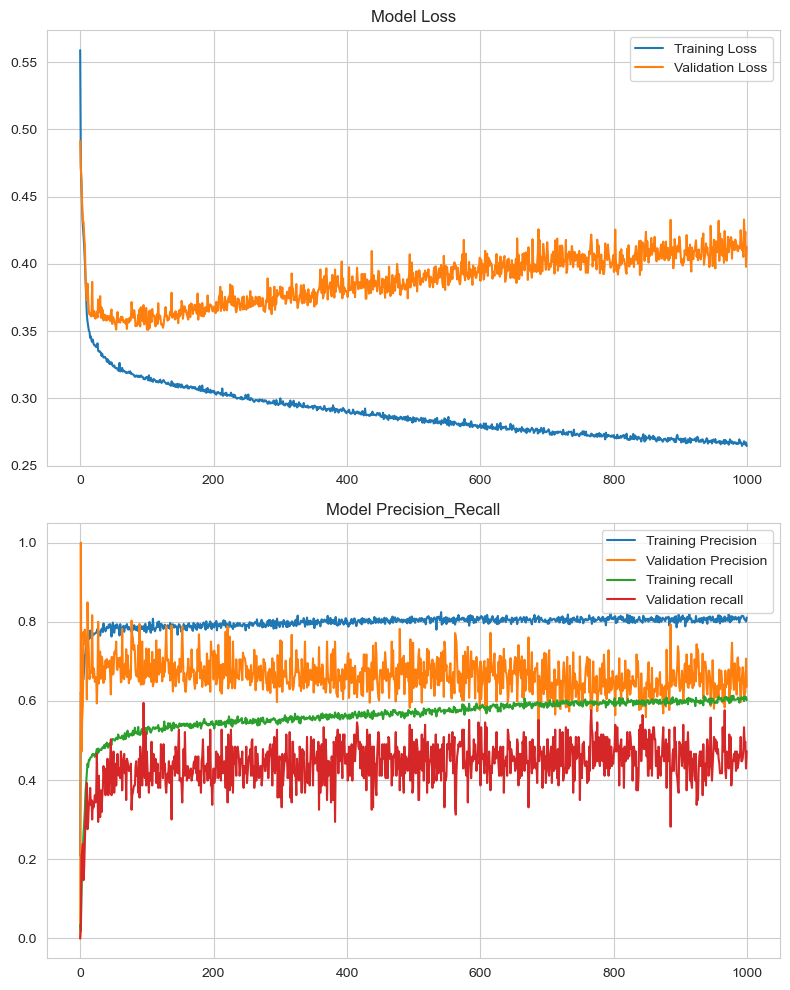

In [67]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["precision"], label="Training Precision")
axes[1].plot(loss_df["val_precision"], label="Validation Precision")
axes[1].set_title("Model Precision_Recall")
axes[1].legend()

axes[1].plot(loss_df["recall"], label="Training recall")
axes[1].plot(loss_df["val_recall"], label="Validation recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

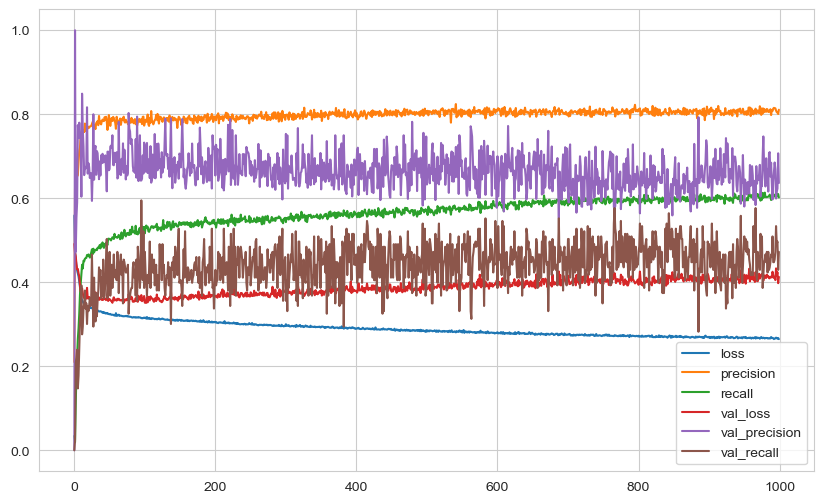

In [68]:
loss_df.plot()
plt.show()

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.4187825918197632, 0.6597222089767456, 0.46683046221733093]

In [70]:
loss, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("precision: ", precision)
print("recall: ", recall)

loss:  0.4187825918197632
precision:  0.6597222089767456
recall:  0.46683046221733093


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 745us/step
[[1495   98]
 [ 217  190]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.66      0.47      0.55       407

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000



63/63 [==============================] - 0s 824us/step


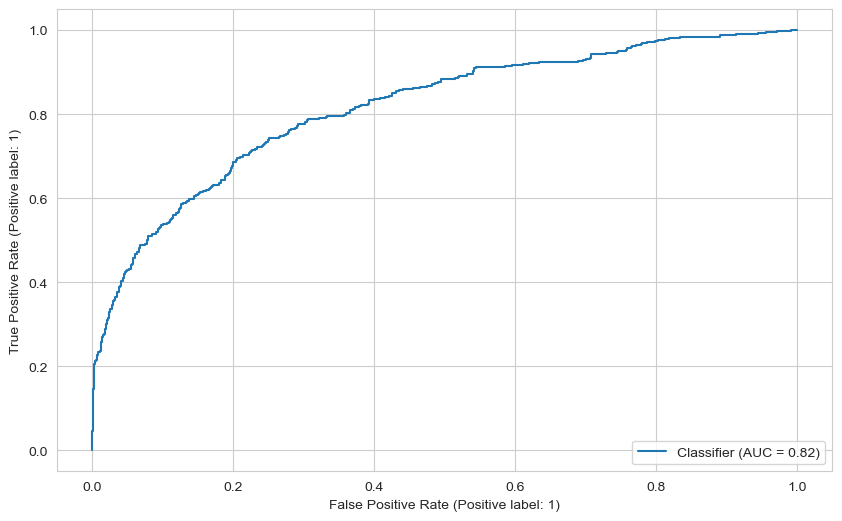

In [72]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

63/63 [==============================] - 0s 987us/step


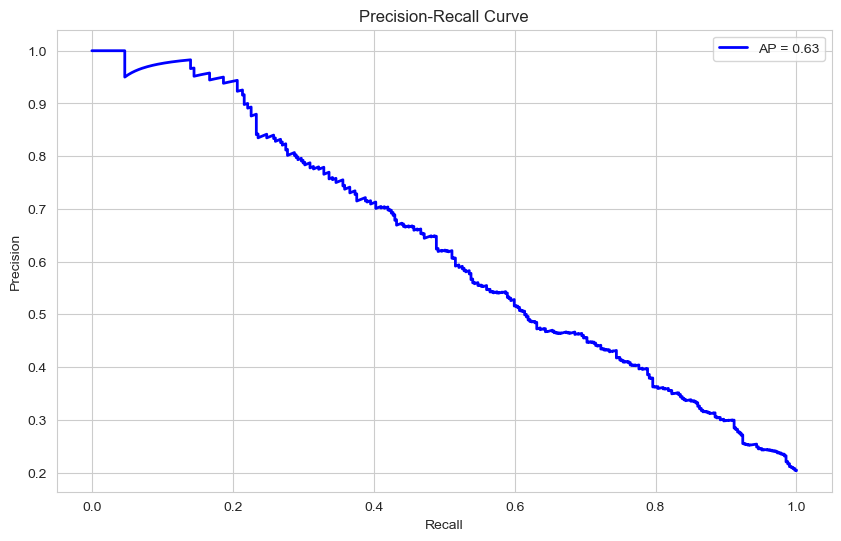

In [73]:
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score
y_pred_proba = model.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [74]:
y_pred = model.predict(X_test) > 0.5
model_AP = average_precision_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 773us/step


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

**The class_weight hyper-parameter is a useful tool in neural networks, particularly for handling imbalanced datasets. It allows you to assign different weights to different classes, giving the model an incentive to pay more attention to the less frequent classes. This can help improve the performance of the model on the minority class.**

In [254]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight

def generate_binary_class_weights(y):
    """
    Generate class weights for binary classification based on the frequency of each class.

    Parameters:
    - y (array-like): Binary labels.

    Returns:
    dict: A dictionary with class labels as keys and their corresponding weights as values.
    """
    unique_classes = np.unique(y)
    class_counts = [np.sum(y == cls) for cls in unique_classes]

    total_samples = len(y)

    class_weights = [total_samples / (len(unique_classes) * count) if count > 0 else 1 for count in class_counts]

    return dict(zip(unique_classes, class_weights))

In [255]:
print("Counts of classes \n", df.Exited.value_counts(), "\n\nProportions of classes: \n", df.Exited.value_counts(normalize = True))
print()
print("Weights of classes")
generate_binary_class_weights(y_train)

Counts of classes 
 Exited
0    7963
1    2037
Name: count, dtype: int64 

Proportions of classes: 
 Exited
0   0.796
1   0.204
Name: proportion, dtype: float64

Weights of classes


{0: 0.6279434850863422, 1: 2.4539877300613497}

### Create The Model

In [707]:
model2 = Sequential()
model2.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

class_weights = generate_binary_class_weights(y_train)

history = model2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=36,
    epochs=1000,
    verbose=1,
    class_weight=class_weights
)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.6679 - recall_11: 0.7137 - val_loss: 0.6569 - val_recall_11: 0.5460
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6131 - recall_11: 0.6742 - val_loss: 0.5858 - val_recall_11: 0.6319
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5720 - recall_11: 0.7212 - val_loss: 0.6489 - val_recall_11: 0.8405
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5404 - recall_11: 0.7348 - val_loss: 0.5592 - val_recall_11: 0.8160
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5100 - recall_11: 0.7464 - val_loss: 0.5491 - val_recall_11: 0.8282
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4933 - recall_11: 0.7526 - val_loss: 0.4015 - val_recall_11: 0.5767
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4831 - recall_11: 0.7546 - val_loss: 0.4193 - 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [709]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,recall_11,val_loss,val_recall_11
0,0.668,0.714,0.657,0.546
1,0.613,0.674,0.586,0.632
2,0.572,0.721,0.649,0.840
3,0.540,0.735,0.559,0.816
4,0.510,0.746,0.549,0.828


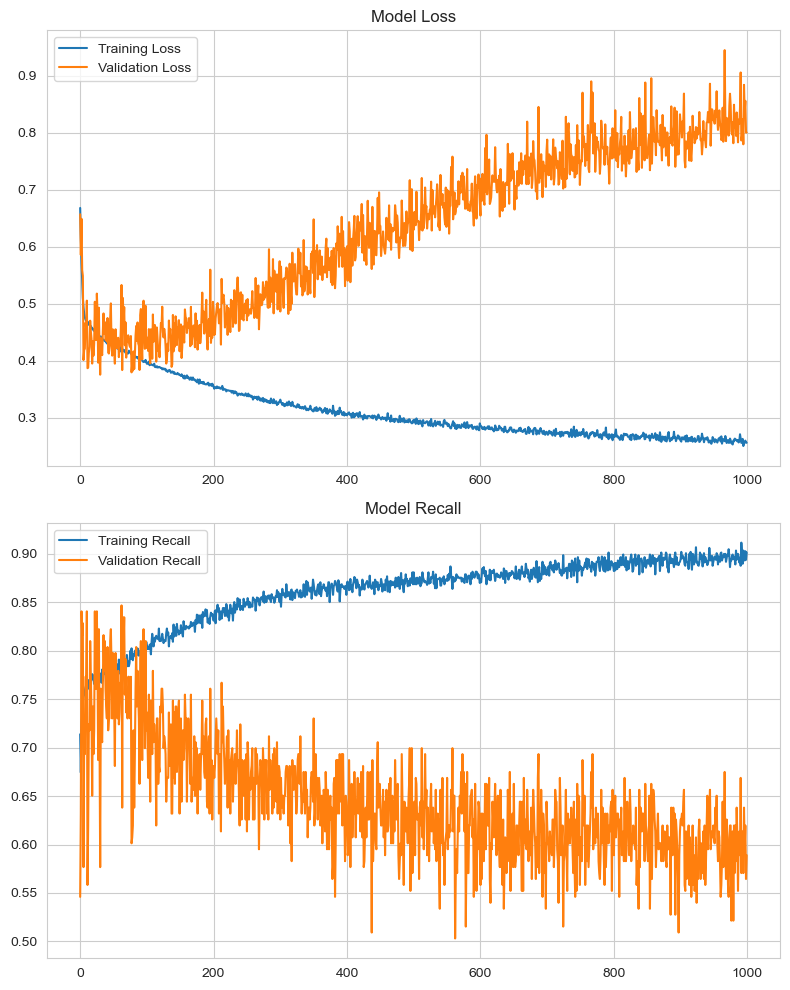

In [711]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Kayıp grafiği
if 'loss' in loss_df.columns and 'val_loss' in loss_df.columns:
    axes[0].plot(loss_df["loss"], label="Training Loss")
    axes[0].plot(loss_df["val_loss"], label="Validation Loss")
    axes[0].set_title("Model Loss")
    axes[0].legend()

# Precision ve recall grafikleri
if 'recall_11' in loss_df.columns and 'val_recall_11' in loss_df.columns:
    axes[1].plot(loss_df["recall_11"], label="Training Recall")
    axes[1].plot(loss_df["val_recall_11"], label="Validation Recall")
    axes[1].set_title("Model Recall")
    axes[1].legend()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

In [536]:
loss, recall = model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4763187766075134
recall:  0.6363636255264282


In [537]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 886us/step
[[1335  258]
 [ 148  259]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1593
           1       0.50      0.64      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.71      2000
weighted avg       0.82      0.80      0.81      2000



63/63 [==============================] - 0s 897us/step


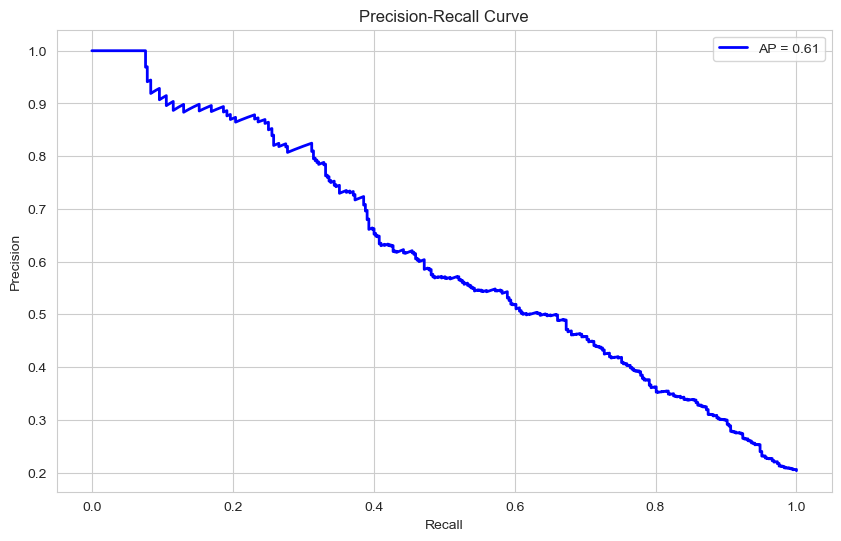

In [538]:
y_pred_proba = model2.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [539]:
y_pred = model2.predict(X_test) > 0.5
model2_AP = average_precision_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 1ms/step


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [606]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.003

In [607]:
model3 = Sequential()

model3.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model3.add(Dense(16, activation="relu"))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(4, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [608]:
model3.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=36,
    epochs=1000,
    verbose=1,
    class_weight=generate_binary_class_weights(y_train)
)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.6540 - recall: 0.7519 - val_loss: 0.6780 - val_recall: 0.7546
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5814 - recall: 0.6960 - val_loss: 0.5710 - val_recall: 0.7423
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5514 - recall: 0.7253 - val_loss: 0.6407 - val_recall: 0.8773
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5168 - recall: 0.7355 - val_loss: 0.5386 - val_recall: 0.8405
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4898 - recall: 0.7423 - val_loss: 0.5279 - val_recall: 0.8528
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4773 - recall: 0.7430 - val_loss: 0.3903 - val_recall: 0.6258
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4721 - recall: 0.7491 - val_loss: 0.4174 - val_recall: 0.7117
Epoch 8/1000
200/200

In [609]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.654,0.752,0.678,0.755
1,0.581,0.696,0.571,0.742
2,0.551,0.725,0.641,0.877
3,0.517,0.736,0.539,0.840
4,0.490,0.742,0.528,0.853


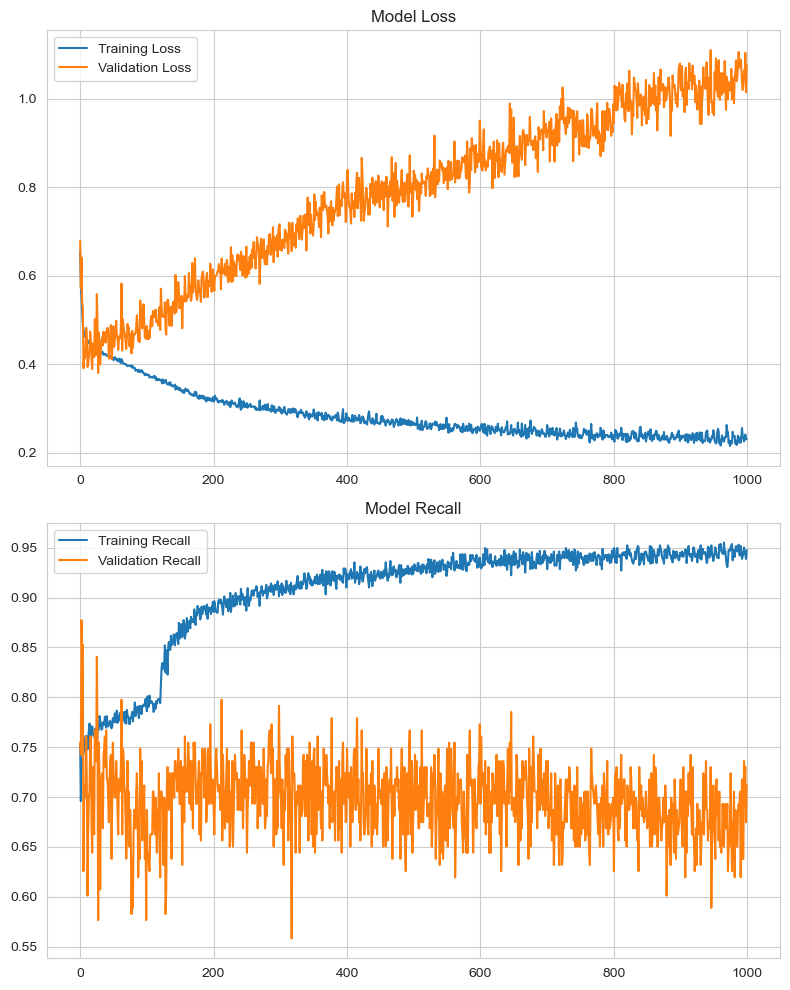

In [610]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Kayıp grafiği
if 'loss' in loss_df.columns and 'val_loss' in loss_df.columns:
    axes[0].plot(loss_df["loss"], label="Training Loss")
    axes[0].plot(loss_df["val_loss"], label="Validation Loss")
    axes[0].set_title("Model Loss")
    axes[0].legend()

# Precision ve recall grafikleri
if 'recall' in loss_df.columns and 'val_recall' in loss_df.columns:
    axes[1].plot(loss_df["recall"], label="Training Recall")
    axes[1].plot(loss_df["val_recall"], label="Validation Recall")
    axes[1].set_title("Model Recall")
    axes[1].legend()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

In [611]:
loss, recall = model3.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.9489138722419739
recall:  0.6707616448402405


In [612]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 769us/step
[[1207  386]
 [ 134  273]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1593
           1       0.41      0.67      0.51       407

    accuracy                           0.74      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000



63/63 [==============================] - 0s 635us/step


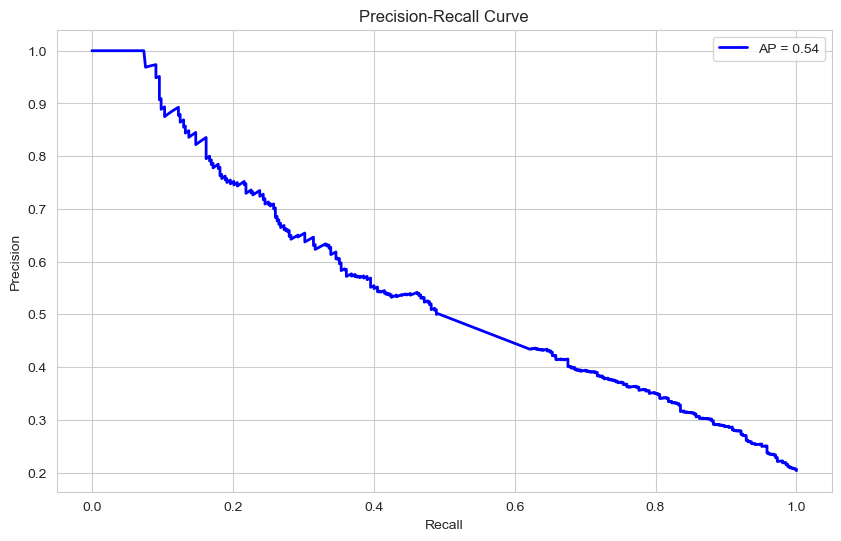

In [613]:
y_pred_proba = model3.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [614]:
y_pred = model3.predict(X_test) > 0.5
model3_AP = average_precision_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 645us/step


### Add Dropout Layer

In [615]:
from tensorflow.keras.layers import Dropout

In [616]:
model4 = Sequential()

model4.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(16, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(8, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(4, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [617]:
model4.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=36,
    epochs=1000,
    verbose=1,
    class_weight=generate_binary_class_weights(y_train)
)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.6955 - recall: 0.2318 - val_loss: 0.6762 - val_recall: 0.0184
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6893 - recall: 0.1943 - val_loss: 0.6769 - val_recall: 0.2331
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6865 - recall: 0.2100 - val_loss: 0.6720 - val_recall: 0.3436
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6785 - recall: 0.3047 - val_loss: 0.6658 - val_recall: 0.4233
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6777 - recall: 0.2611 - val_loss: 0.6619 - val_recall: 0.2515
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6788 - recall: 0.2761 - val_loss: 0.6561 - val_recall: 0.3006
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.6711 - recall: 0.3436 - val_loss: 0.6501 - val_recall: 0.4724
Epoch 8/1000
200/200

In [618]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.695,0.232,0.676,0.018
1,0.689,0.194,0.677,0.233
2,0.687,0.210,0.672,0.344
3,0.679,0.305,0.666,0.423
4,0.678,0.261,0.662,0.252


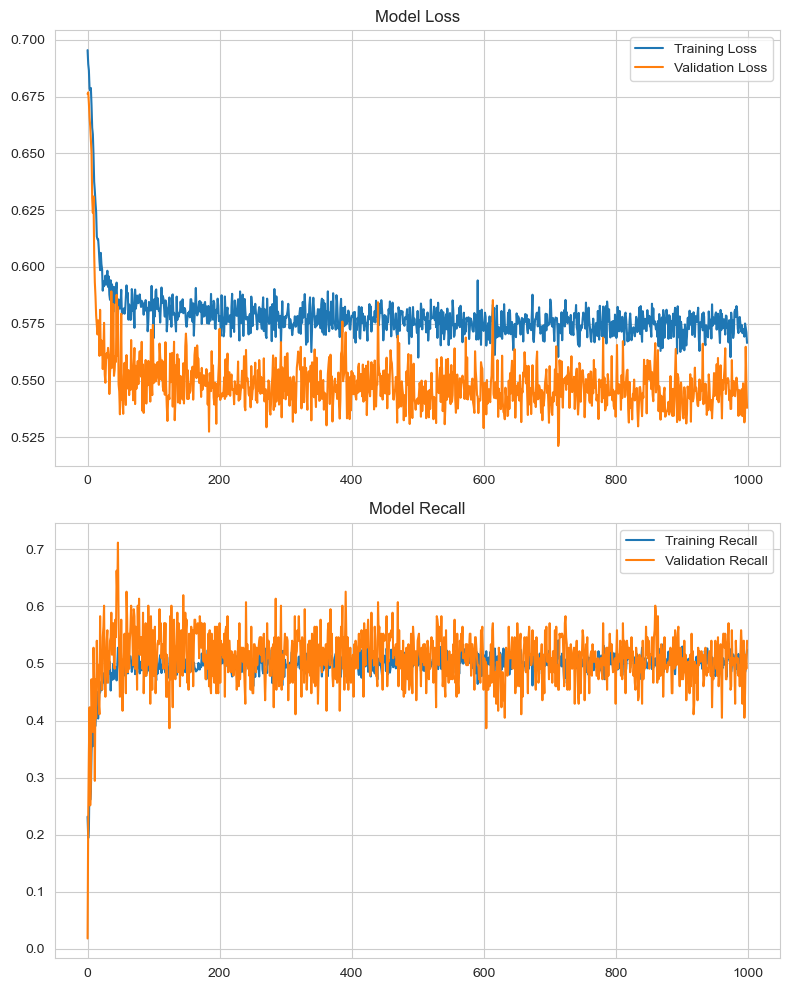

In [619]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Kayıp grafiği
if 'loss' in loss_df.columns and 'val_loss' in loss_df.columns:
    axes[0].plot(loss_df["loss"], label="Training Loss")
    axes[0].plot(loss_df["val_loss"], label="Validation Loss")
    axes[0].set_title("Model Loss")
    axes[0].legend()

# Precision ve recall grafikleri
if 'recall' in loss_df.columns and 'val_recall' in loss_df.columns:
    axes[1].plot(loss_df["recall"], label="Training Recall")
    axes[1].plot(loss_df["val_recall"], label="Validation Recall")
    axes[1].set_title("Model Recall")
    axes[1].legend()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

In [620]:
loss, recall = model4.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5325798988342285
recall:  0.5454545617103577


In [621]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 648us/step
[[1449  144]
 [ 185  222]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.61      0.55      0.57       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000



63/63 [==============================] - 0s 653us/step


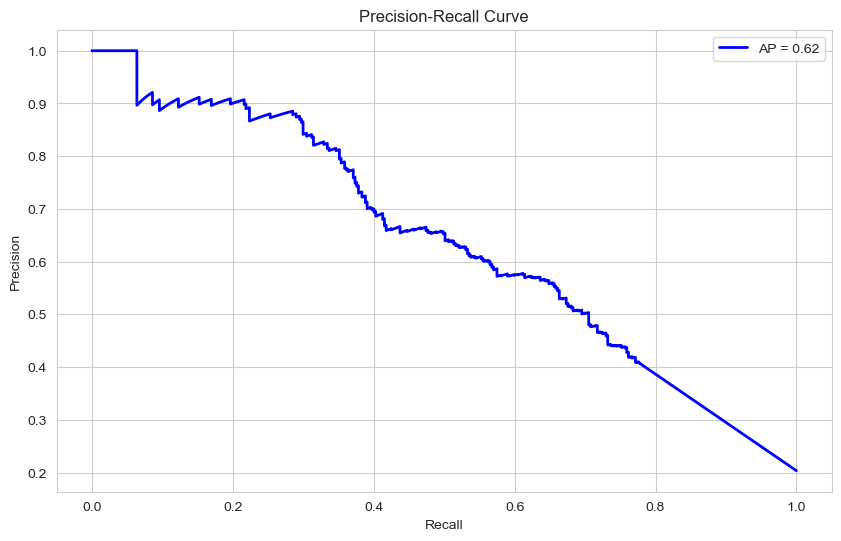

In [622]:
y_pred_proba = model4.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

model4_average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {model4_average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [623]:
y_pred = model4.predict(X_test) > 0.5
model4_AP = average_precision_score(y_test, y_pred)
model4_precision = precision_score(y_test, y_pred)
model4_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 672us/step


### Add Early Stop

In [624]:
from tensorflow.keras.callbacks import EarlyStopping

In [625]:
from tensorflow.keras.optimizers import Adam
model5 = Sequential()

model5.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(16, activation="relu"))
model5.add(Dense(8, activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))


opt=Adam(learning_rate = learning_rate)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

#### Monitor the "val_loss" as metric

In [626]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [627]:
model5.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=36,
    epochs=1000,
    verbose=1,
    class_weight=generate_binary_class_weights(y_train),
    callbacks=[early_stop]
)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.6574 - recall: 0.7880 - val_loss: 0.6363 - val_recall: 0.7239
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5758 - recall: 0.7014 - val_loss: 0.5467 - val_recall: 0.7423
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5211 - recall: 0.7382 - val_loss: 0.5976 - val_recall: 0.8834
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4971 - recall: 0.7573 - val_loss: 0.5480 - val_recall: 0.8528
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4862 - recall: 0.7607 - val_loss: 0.4931 - val_recall: 0.7914
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4794 - recall: 0.7587 - val_loss: 0.4262 - val_recall: 0.7117
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4739 - recall: 0.7689 - val_loss: 0.4406 - val_recall: 0.7423
Epoch 8/1000
200/200

In [628]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.657,0.788,0.636,0.724
1,0.576,0.701,0.547,0.742
2,0.521,0.738,0.598,0.883
3,0.497,0.757,0.548,0.853
4,0.486,0.761,0.493,0.791


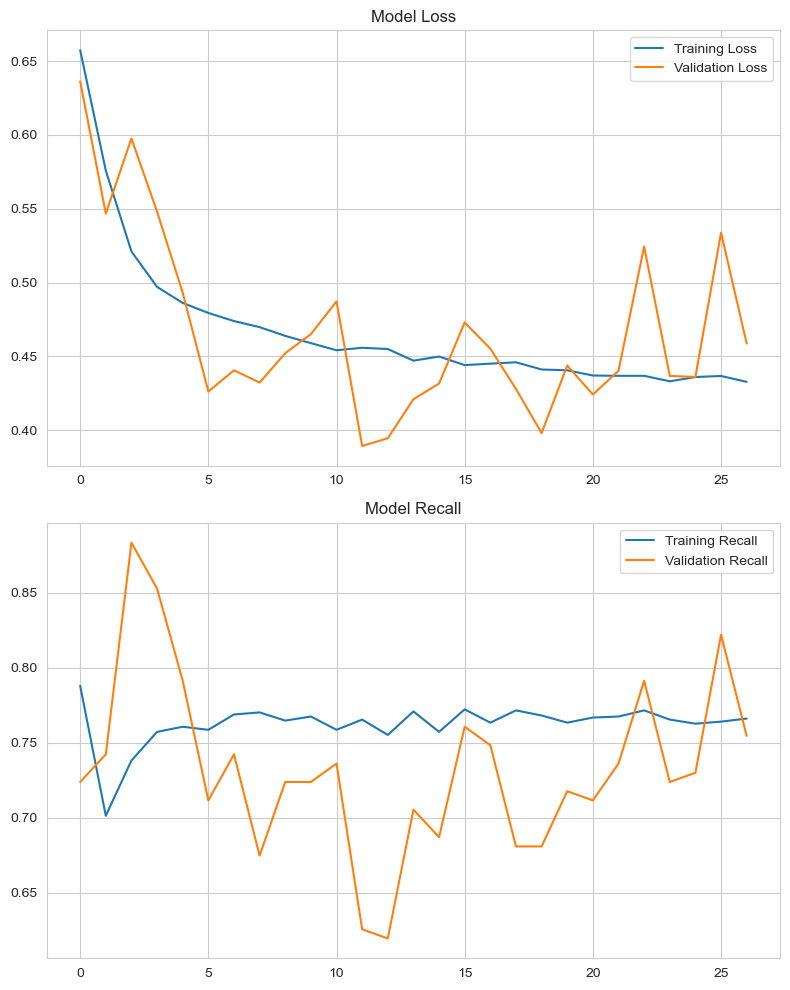

In [629]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Kayıp grafiği
if 'loss' in loss_df.columns and 'val_loss' in loss_df.columns:
    axes[0].plot(loss_df["loss"], label="Training Loss")
    axes[0].plot(loss_df["val_loss"], label="Validation Loss")
    axes[0].set_title("Model Loss")
    axes[0].legend()

# Precision ve recall grafikleri
if 'recall' in loss_df.columns and 'val_recall' in loss_df.columns:
    axes[1].plot(loss_df["recall"], label="Training Recall")
    axes[1].plot(loss_df["val_recall"], label="Validation Recall")
    axes[1].set_title("Model Recall")
    axes[1].legend()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

In [630]:
loss, recall = model5.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.41142380237579346
recall:  0.5896806120872498


In [631]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 663us/step
[[1400  193]
 [ 167  240]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1593
           1       0.55      0.59      0.57       407

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.73      2000
weighted avg       0.82      0.82      0.82      2000



63/63 [==============================] - 0s 658us/step


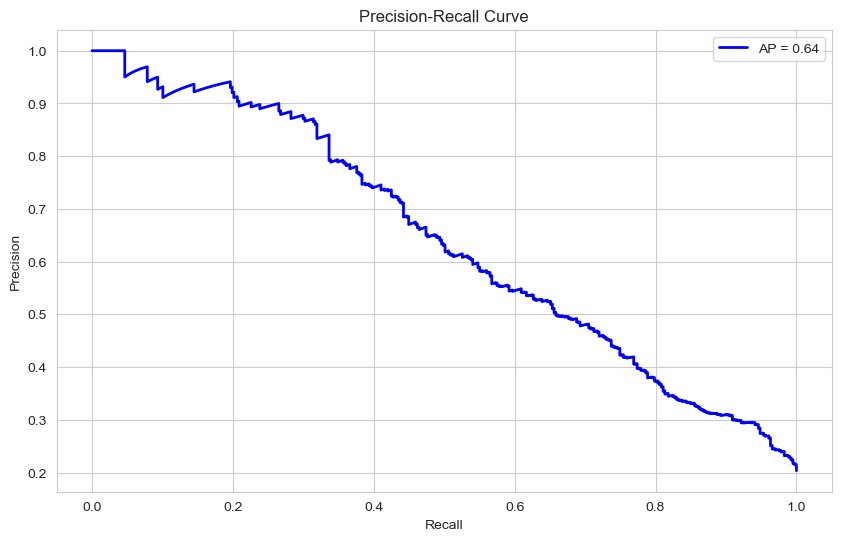

In [632]:
y_pred_proba = model5.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [633]:
y_pred = model5.predict(X_test) > 0.5
model5_AP = average_precision_score(y_test, y_pred)
model5_precision = precision_score(y_test, y_pred)
model5_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 660us/step


#### Monitor the "val_recall" as metric

In [634]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [635]:
from tensorflow.keras.optimizers import Adam
model6 = Sequential()

model6.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dense(16, activation="relu"))
model6.add(Dense(8, activation="relu"))
model6.add(Dense(4, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [636]:
model6.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=36,
    epochs=1000,
    verbose=1,
    class_weight=generate_binary_class_weights(y_train),
    callbacks=[early_stop]
)

Epoch 1/1000
200/200 [==============================] - 1s 2ms/step - loss: 0.6436 - recall: 0.6762 - val_loss: 0.6549 - val_recall: 0.7117
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5725 - recall: 0.6987 - val_loss: 0.5428 - val_recall: 0.6994
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5353 - recall: 0.7253 - val_loss: 0.6042 - val_recall: 0.8528
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.5173 - recall: 0.7376 - val_loss: 0.5150 - val_recall: 0.7853
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4989 - recall: 0.7526 - val_loss: 0.5210 - val_recall: 0.8405
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4889 - recall: 0.7464 - val_loss: 0.3934 - val_recall: 0.5460
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4804 - recall: 0.7471 - val_loss: 0.4353 - val_recall: 0.7117
Epoch 8/1000
200/200

In [637]:
loss_df = pd.DataFrame(model6.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.644,0.676,0.655,0.712
1,0.573,0.699,0.543,0.699
2,0.535,0.725,0.604,0.853
3,0.517,0.738,0.515,0.785
4,0.499,0.753,0.521,0.840


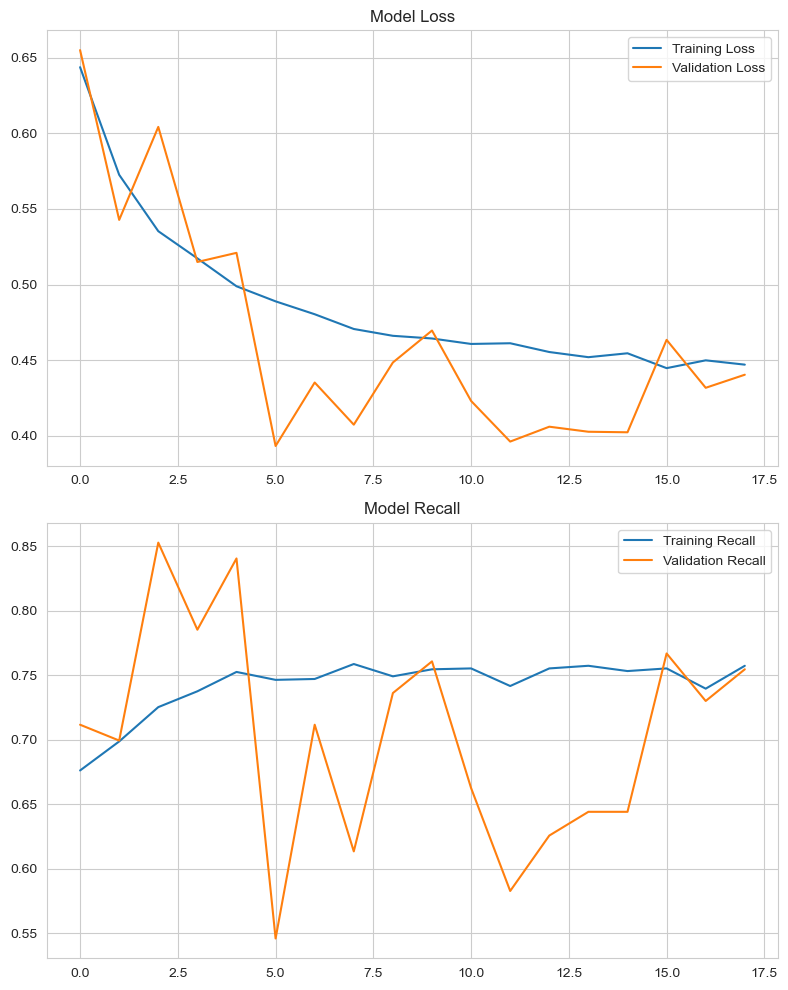

In [638]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Kayıp grafiği
if 'loss' in loss_df.columns and 'val_loss' in loss_df.columns:
    axes[0].plot(loss_df["loss"], label="Training Loss")
    axes[0].plot(loss_df["val_loss"], label="Validation Loss")
    axes[0].set_title("Model Loss")
    axes[0].legend()

# Precision ve recall grafikleri
if 'recall' in loss_df.columns and 'val_recall' in loss_df.columns:
    axes[1].plot(loss_df["recall"], label="Training Recall")
    axes[1].plot(loss_df["val_recall"], label="Validation Recall")
    axes[1].set_title("Model Recall")
    axes[1].legend()

# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

In [639]:
loss, recall = model6.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6439233422279358
recall:  0.8353808522224426


In [640]:
y_pred = model6.predict(X_test) > 0.5 # model.predict gives us probability.
                                      # The assignment is established by setting it to 0.5; it cannot be used on its own
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 645us/step
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1593
           1       0.35      0.84      0.50       407

    accuracy                           0.65      2000
   macro avg       0.64      0.72      0.62      2000
weighted avg       0.82      0.65      0.69      2000



63/63 [==============================] - 0s 650us/step


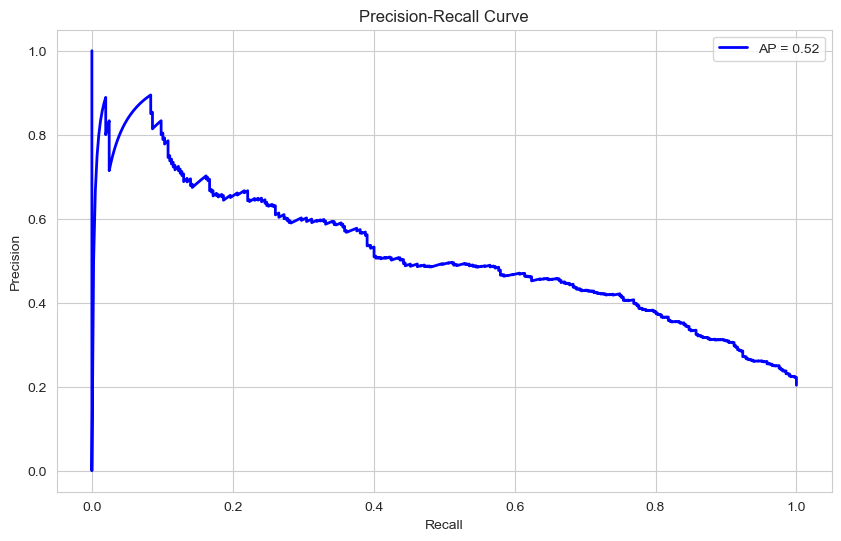

In [641]:
y_pred_proba = model6.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [642]:
y_pred = model6.predict(X_test) > 0.5
model6_AP = average_precision_score(y_test, y_pred)
model6_precision = precision_score(y_test, y_pred)
model6_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 638us/step


## Optuna

In [643]:
#!pip install optuna

In [712]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from optuna.trial import Trial

In [713]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [714]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [715]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2024-07-22 14:17:52,565] A new study created in memory with name: no-name-2a9c636c-96a7-49be-940a-d890447464f2
C:\Users\nurda\anaconda3\envs\kerasenv\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\nurda\anaconda3\envs\kerasenv\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\nurda\anaconda3\envs\kerasenv\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.opti

Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2024-07-22 14:17:59,556] Trial 0 finished with value: 0.9631449580192566 and parameters: {'n_units1': 67, 'n_units2': 17, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01625909209672278, 'w0': 0.0145803680081545, 'w1': 0.6392159751286408}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2024-07-22 14:18:07,437] Trial 1 finished with value: 0.7149876952171326 and parameters: {'n_units1': 105, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008267313598216303, 'w0': 0.08128447064581884, 'w1': 0.5565683056776333}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2024-07-22 14:18:13,245] Trial 2 finished with value: 0.11302211135625839 and parameters: {'n_units1': 106, 'n_units2': 102, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003366862450913151, 'w0': 0.9381805736000521, 'w1': 0.05701464993543068}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2024-07-22 14:18:23,635] Trial 3 finished with value: 0.6486486196517944 and parameters: {'n_units1': 66, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.004564545368365091, 'w0': 0.021753262880405536, 'w1': 0.10194521296462997}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 62.
Epoch 77: early stopping


[I 2024-07-22 14:18:37,575] Trial 4 finished with value: 0.08599508553743362 and parameters: {'n_units1': 128, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0006658458825176284, 'w0': 4.778237545519148, 'w1': 0.05656734909048802}. Best is trial 0 with value: 0.9631449580192566.
[I 2024-07-22 14:18:54,055] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 51, 'n_units2': 109, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0010870930199203337, 'w0': 3.4586776155467143, 'w1': 3.8407005061122184}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-22 14:18:57,334] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 77, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.08540612973105227, 'w0': 0.16350736224123144, 'w1': 0.03786149042190611}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-22 14:19:01,128] Trial 7 finished with value: 0.5577395558357239 and parameters: {'n_units1': 69, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.8592182600123194e-05, 'w0': 0.015674969671544556, 'w1': 0.3187929356259381}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2024-07-22 14:19:08,579] Trial 8 finished with value: 0.2309582382440567 and parameters: {'n_units1': 40, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001118647108561603, 'w0': 1.0523089761872644, 'w1': 0.25848330835831956}. Best is trial 0 with value: 0.9631449580192566.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-22 14:19:12,274] Trial 9 finished with value: 0.3611793518066406 and parameters: {'n_units1': 98, 'n_units2': 23, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.368093943604464e-05, 'w0': 0.011601380065767428, 'w1': 4.2325426301681865}. Best is trial 0 with value: 0.9631449580192566.


{'n_units1': 67,
 'n_units2': 17,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.01625909209672278,
 'w0': 0.0145803680081545,
 'w1': 0.6392159751286408}

In [716]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.4723 - recall: 0.0478 - val_loss: 0.4172 - val_recall: 0.1074
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4187 - recall: 0.2967 - val_loss: 0.5265 - val_recall: 0.0671
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3829 - recall: 0.3816 - val_loss: 0.3467 - val_recall: 0.3490
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.3687 - recall: 0.3998 - val_loss: 0.3350 - val_recall: 0.3960
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.3609 - recall: 0.3968 - val_loss: 0.3651 - val_recall: 0.5973
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3566 - recall: 0.4150 - val_loss: 0.3285 - val_recall: 0.4362
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3524 - recall: 0.4332 - val_loss: 0.3210 - val_recall: 0.5034
Epoch 8/100
102/102 [======

In [717]:
history = model.history.history

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [718]:
history_df = pd.DataFrame(model.history.history)
history_df.head()

,loss,recall,val_loss,val_recall
0,0.472,0.048,0.417,0.107
1,0.419,0.297,0.527,0.067
2,0.383,0.382,0.347,0.349
3,0.369,0.400,0.335,0.396
4,0.361,0.397,0.365,0.597


In [719]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3645263910293579
recall:  0.43488943576812744


In [720]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 663us/step
[[1523   70]
 [ 230  177]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



63/63 [==============================] - 0s 666us/step


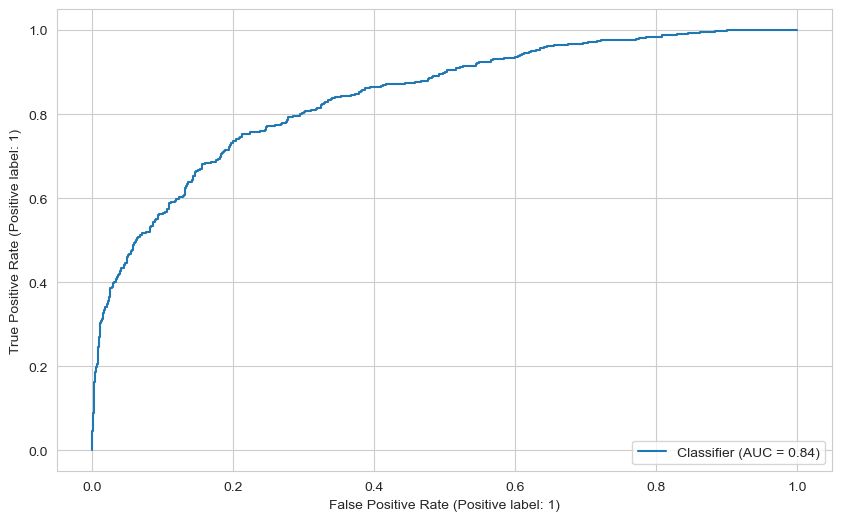

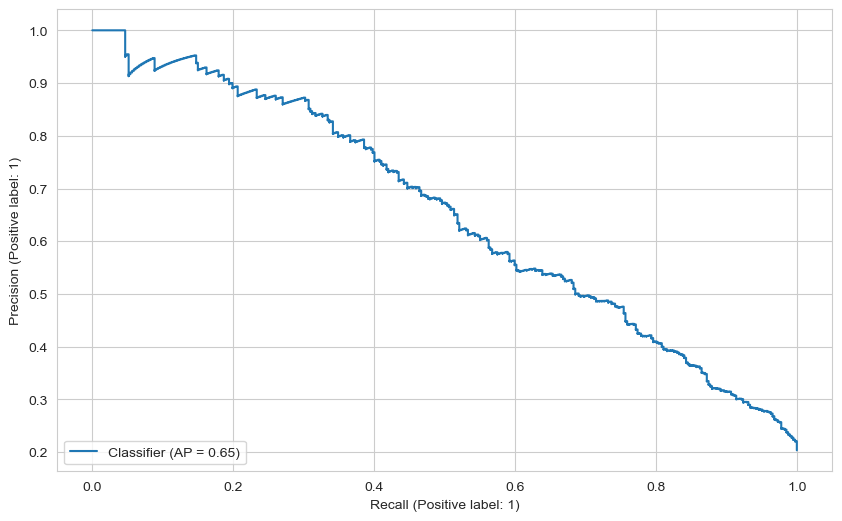

In [721]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [722]:
roc_auc_score(y_test, y_pred_proba)

0.8415472483269093

In [723]:
y_pred = model.predict(X_test) > 0.5
model_AP = average_precision_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 702us/step


# Final Model and Model Deployment

In [724]:
import pickle

pickle.dump(scaler, open("scaler_final_churn", "wb"))

In [725]:
loss, recall = model4.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5325798988342285
recall:  0.5454545617103577


In [726]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 765us/step
[[1449  144]
 [ 185  222]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.61      0.55      0.57       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000



In [727]:
model4.save("final_model_churn.h5")

C:\Users\nurda\anaconda3\envs\kerasenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [728]:
from tensorflow.keras.models import load_model

In [729]:
model_churn = load_model("final_model_churn.h5")
scaler_final_churn = pickle.load(open("scaler_final_churn", "rb"))

## Prediction

In [730]:
single_churn = df.drop("Exited", axis=1).iloc[110:111, :]
single_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
110,685,30,3,90536.810,1,0,1,63082.880,True,False,True


In [731]:
single_churn = scaler_final_churn.transform(single_churn)
single_churn

array([[0.67      , 0.16216216, 0.3       , 0.40733241, 0.        ,
        0.        , 1.        , 0.31542091, 1.        , 0.        ,
        1.        ]])

In [732]:
(model_churn.predict(single_churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 73ms/step


array([[0]])

In [733]:
model_churn.predict(single_churn)

1/1 [==============================] - 0s 26ms/step


array([[0.35231206]], dtype=float32)

In [734]:
df["Exited"].iloc[110]

0

**Model Prediction: The model predicted 0 (the customer will not churn) with a probability of approximately 0.352.**

**True Label: The actual label is 0 (the customer did not churn).**

**Conclusion:**

Seven distinct deep learning models, each with three hidden layers, were used in this investigation. The techniques used fall into the following categories:
Non Class-weight
Class-weight
Class-weight, learning_rate
Class-weight, learning_rate, dropout
Class-weight, Learning_rate, Earlystop-val_loss
Class-weight, Learning_rate, Earlystop-val_recall
Optuna


Various configurations of the models were tested, encompassing changes in class weights, learning rates, dropout rates, and early termination conditions. The analysis showed that tweaking the settings for Class-weight, Learning_rate, and Earlystop-val_loss enhanced recall scores; this was especially important when working with an unbalanced dataset. Furthermore, an attempt is made in the imbalance datasets to make a trade-off between recall and precision, or to raise the f1 score. As a result, the final model that had the Class-weight, Learning_rate, and Earlystop-val_loss set was only the fifth model.

Training the models, storing the scaling operations used in training, and predicting individual observations from the model's saved state were the steps in the procedure.

This thorough investigation and fine-tuning procedure utilizing deep learning methods effectively tackled a Binary Classification issue, emphasizing the need of parameter changes for best results.

It's also important to note that, despite the analysis's disdain for outliers, deep learning models showed resilience against them.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___